# 이미지 연산

## 1. 두 영상 합성

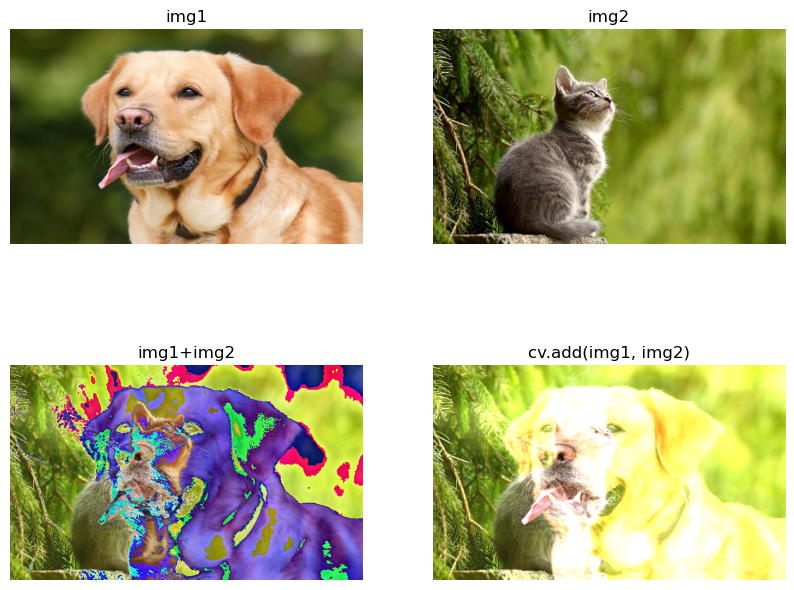

In [ ]:
from IPython.core.pylabtools import figsize
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 읽기
img1 = cv2.imread('../cv_images/dog.jpg')
img2 = cv2.imread('../cv_images/cat.jpg')

# img1의 크기를 img2와 동일하게 조정; (전제: 크기가 같아야 이미지 연산이 가능함)
img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# 이미지 더하기
img3 = img1_resized + img2  # 더하기 연산 => 자릿수 오버플로우 에러 (0 ~ 255)
img4 = cv2.add(img1_resized, img2)  # OpenCV 함수 => 정상적으로 합성됨.

# 딕셔너리로 저장
imgs = {'img1': img1_resized, 'img2': img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# 이미지 출력
fig = plt.figure(figsize=(10, 8))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(221+i) # 221 = (22 : 2x2), (1 + i : index)
    plt.axis('off') 
    plt.imshow(v[:, :, ::-1]) 
    plt.title(k)

plt.show()

## 2.비트와이즈(bitwise) 연산
- bitwise_and(img1, img2, mask=None) : 각 픽셀에 대한 비트와이즈 AND 연산
- bitwise_or(img1, img2, mask=None) : 각 픽셀에 대한 비트와이즈 OR 연산
- bitwise_xor(img1, img2, mask=None) : 각 픽셀에 대한 비트와이즈 XOR 연산
- bitwise_not(img1, mask=None) : 각 픽셀에 대한 비트와이즈 NOT 연산

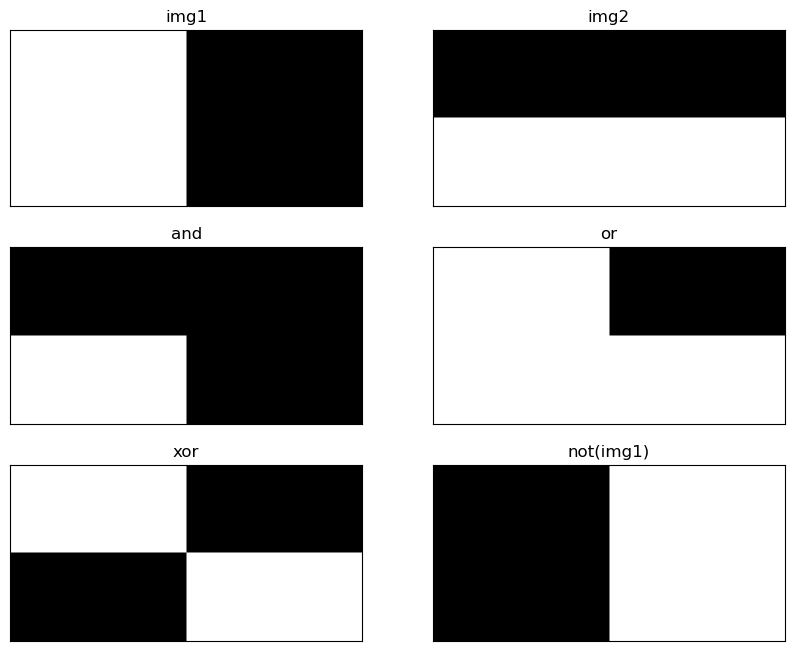

In [2]:
import numpy as np, cv2
import matplotlib.pylab as plt

# height: 200 width: 400 검정색 이미지 생성
img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8) 

# img[y슬라이싱, x슬라이싱]
img1[:, :200] = 255     # 왼쪽은 흰색, 오른쪽은 검정
img2[100:200, :] = 255      # 위쪽은 검정색, 아래쪽은 흰색

# 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

# 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}

fig = plt.figure(figsize=(10, 8))

for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()